# Experimentos: Medida do período de um pêndulo simples

## Medição do período na aproximação de pequenos ângulos.


A medida deve ser feita para 4 comprimento diferentes. Note que o erro da media do comprimento $U_l$ é dado por:

$$
u_l=\frac{\Delta r}{\sqrt{3}} 
$$

mas como $\Delta r = 1,0$ mm, temos então que $u_l=0,58$ mm.


| Comprimento | Tamanho (mm) | Erro $u_l$  (mm) |
| :---------- | ------------ | ---------------- |
| $L_1$       | 700,00       | 0,58             |
| $L_2$       | 750,00       | 0,58             |
| $L_3$       | 800,00       | 0,58             |
| $L_4$       | 850,00       | 0,58             |

Para cada comprimento devemos medir 15 vezes o valor do período. Considerando $g=9.78$ m/s$^2$

 

| Medida ($L_1 = 700,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.4063  |
| 2                          | 1.4063  |
| ...                        | ...     |
| 14                         | 1.4063  |
| 15                         | 1.4063  |
| Média                      | 1.4063  |
| Desvio padrão              | 0       |



| Medida ($L_2 = 750,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.5069  |
| 2                          | 1.5069  |
| ...                        | ...     |
| 14                         | 1.5069  |
| 15                         | 1.5069  |
| Média                      | 1.5069  |
| Desvio padrão              | 0       |



| Medida ($L_3 = 800,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.6073  |
| 2                          | 1.6073  |
| ...                        | ...     |
| 14                         | 1.6073  |
| 15                         | 1.6073  |
| Média                      | 1.6073  |
| Desvio padrão              | 0       |



| Medida ($L_4 = 850,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.7078  |
| 2                          | 1.7078  |
| ...                        | ...     |
| 14                         | 1.7078  |
| 15                         | 1.7078  |
| Média                      | 1.7078  |
| Desvio padrão              | 0       |


Solte o pêndulo de um ângulo menor ou igual a $10^{\circ}$, conforme ilustrado pela figura ao lado. Meça três vezes o período de uma oscilação completa com o cronômetro.

- **Período do pêndulo para  $L_1$ :** 1.4063 s
- **Período do pêndulo para  $L_2$ :** 1.5069 s
- **Período do pêndulo para  $L_3$ :** 1.6073 s
- **Período do pêndulo para  $L_4$ :** 1.7078 s


$$
\boxed{ T^2 =\frac{4\pi^2}{g} \ell} \qquad\qquad \text{ou} \qquad\qquad \boxed{ T = \sqrt{\frac{4\pi^2}{g} \ell} }
$$



| $N$  | $L$ (mm)  | $T$ (s) | $T^2$ (s$^2$) | $L\cdot T^2$ (m$\cdot$s$^2$) | $L^2$ (m$^2$) |
| ---- | :-------- | :------ | :------------ | :--------------------------- | :------------ |
| 1    | 700,00    | 1.4063  | 1.9777        | 1.3844                       | 0.4900        |
| 2    | 750,00    | 1.5069  | 2.2707        | 1.7030                       | 0.5625        |
| 3    | 800,00    | 1.6073  | 2.5834        | 2.0667                       | 0.6400        |
| 4    | 850,00    | 1.7078  | 2.9166        | 2.4791                       | 0.7225        |
| $\sum$ | 3100,00 | 6.2283  | 9.7484        | 7.6332                       | 2.4150        |


# Gerando os resultado experimentais 

Será necessário instalar a biblioteca 

```bash
sudo -H pip3 install scikit-learn
```
 
Para os usuários do Anaconda


```bash
conda install scikit-learn
```
 
Para os usuários do Anaconda



Para maiores detalhes sobre a biblioteca pandas veja:

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/ecosystem.html)

- [scikit-learn](https://scikit-learn.org/stable/documentation.html)

- [Estatística Descritiva com Python](http://felipegalvao.com.br/blog/2016/03/31/estatistica-descritiva-com-python/)


In [1]:
# Importando as biblioteca a serem usada
import numpy as np                  # obtém acesso aos rápidos arrays da numpy 
import matplotlib.pyplot as plt     # Para fazer os gráficos das funções
import pandas as pd                 # Para ler e fazer as tabelas de dados
from sklearn.linear_model import LinearRegression  # Faz a regressão linear
# permite que se mostre os gráficos nesse ambiente
%matplotlib inline 

In [2]:
# Essa função gera um número aleatório
a = np.random.rand()
print(a)

0.3830588904846537


In [3]:
g=9.782
def periodo_rnd(l, taxa):
    aux = l*((4.0*np.pi*np.pi)/g)
    if np.random.rand() >= 0.50 :
        t = aux + taxa*aux*np.random.rand()
    else:
        t = aux - taxa*aux*np.random.rand()
    return np.sqrt(t)    

In [4]:
# Aqui vemos que há um resultado diferente toda vez que a função é chamada
tx =0.05
for x in range(0,10):
    print(periodo_rnd(0.7, tx))

1.7077076074452833
1.7103272998348968
1.7111018177378943
1.6416238279257962
1.6651256148666773
1.6412449221655454
1.6639760815252473
1.6875432198768572
1.6887908277823405
1.6884209159902686


In [5]:
periodo_rnd(0.7,0.0)

1.680796206157556

Vamoas construir o primeiro conjunto de dados

In [6]:
# Tabela 1
n=15   # Número de medidas
L=0.7
tx=0.05
Nome = str('Tabela_L_')+str(int(L*1000))+'.dat'
f = open(Nome , 'w')
for i in range(1,n+1):
    linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
    f.write( linha )
f.close()

In [7]:
! cat Tabela_L_700.dat

1	1.6435765816256314
2	1.670767349639648
3	1.6457795973403115
4	1.691934163017841
5	1.7064718446296083
6	1.6386931012230856
7	1.6580869400785616
8	1.6907244051319323
9	1.6916533305684436
10	1.6811370102751677
11	1.6781603370782145
12	1.68564361624387
13	1.6567555345943474
14	1.718135906076004
15	1.6807604114587917


In [8]:
# Remove o arquivo anterior
! rm -f Tabela_L_700.dat

In [9]:
# Gera tabela dat/csv sem cabeçalho
def gera_tab(n,L,tx):
    Nome = str('Tabela_L_')+str(int(L*1000))+'.csv'
    f = open(Nome , 'w')
    for i in range(1,n+1):
        linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
        f.write( linha )
    f.close()

In [10]:
# Tabela 2
gera_tab(15,0.75,0.05)

In [11]:
! cat Tabela_L_750.csv

1	1.735724020826028
2	1.7027174104576785
3	1.7195921584120555
4	1.7571146422108437
5	1.7555098733676777
6	1.700766785242155
7	1.7255899007972662
8	1.7758565074354575
9	1.772907795084369
10	1.7594957068954773
11	1.729370739822112
12	1.7296160380181909
13	1.7332495026052812
14	1.6959946229137135
15	1.731996735979773


In [12]:
# Gerando Tabela 3
gera_tab(15,0.80,0.05)
# Gerando tabela 4
gera_tab(15,0.85,0.05)

In [13]:
! cat Tabela_L_800.csv

1	1.7704394548133129
2	1.7780973249525651
3	1.8006309668657507
4	1.798208828510247
5	1.8123800383845114
6	1.766935948800254
7	1.752113556510258
8	1.7538886841712038
9	1.8117466671384186
10	1.838042072416483
11	1.8118926556645996
12	1.7606013670931482
13	1.816589384714246
14	1.8099253561118054
15	1.751716752225441


In [14]:
# Remove os arquivos anteriores
! rm -f Tabela_L_*.csv

In [15]:
# Tabela csv: acrescenta o cabeçalho
def gera_tabcsv(n,L,tx):
    Nome = str('Tabela_L_')+str(int(L*1000))+'.csv'
    f = open(Nome , 'w')
    linha='Medida ' + "\t" + "Período\n"
    f.write( linha )
    for i in range(1,n+1):
        linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
        f.write( linha )
    f.close()

In [16]:
#Gera tabela csv Com cabeçalho
gera_tabcsv(15,0.65,0.05)

In [17]:
! cat Tabela_L_650.csv

Medida 	Período
1	1.5916048315566662
2	1.6398671193310923
3	1.5853219212855654
4	1.5985657739821613
5	1.632411495783541
6	1.6105066173632685
7	1.584903798625867
8	1.6312061418082557
9	1.6043787393765199
10	1.625871023029289
11	1.611276756978416
12	1.5890339317713575
13	1.655109170941922
14	1.5811834340655524
15	1.6207668962438093


In [18]:
! rm -f Tabela_L_*.csv

A seguir mostramos como podemos fazer tudo junto:

In [25]:
# Vamos fazer tudo junto
N=50
tx=0.05
# Lista elas podem ser de ambas as formas, a primeira é mais geral
#Comp = [i/100 for i in range(70,95,5)]
Comp = [0.70, 0.75, 0.80, 0.85, 0.90]
for L in Comp:
    print("L = ", L)
    Nome='Tabela_L_'+str(int(L*1000))+'.csv'
    f = open(Nome, 'w')
    for i in range(1,N+1):
        linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
        f.write( linha )
    f.close()

L =  0.7
L =  0.75
L =  0.8
L =  0.85
L =  0.9


 Entretanto não estamos fazendo uso das funções criadas anteriormente, nesse caso teríamos

In [26]:
# Vamos remover todos os arquivos antes
! rm -f *.csv

In [29]:
# Vamos fazer tudo junto
N=50
tx=0.05
Comprimentos = [ i/100 for i in range(50,100,5) ]
for L in Comprimentos:
    print("L = ", L)
    gera_tabcsv(N,L,tx)

L =  0.5
L =  0.55
L =  0.6
L =  0.65
L =  0.7
L =  0.75
L =  0.8
L =  0.85
L =  0.9
L =  0.95


In [39]:
# Para obter todos os arquivos com extensão csv no diretório corrente
import glob, os
#Mudar o diretório caso seja necessário
#os.chdir("/IYPT")
Arqs=glob.glob('./*.csv')
print(Arqs)

['./Tabela_L_550.csv', './Tabela_L_850.csv', './Tabela_L_950.csv', './Tabela_L_650.csv', './Tabela_L_700.csv', './Tabela_L_750.csv', './Tabela_L_500.csv', './Tabela_L_600.csv', './Tabela_L_900.csv', './Tabela_L_800.csv']


In [40]:
# Vamos colocar em ordem crescente os arquivos
Arqs.sort()
print(Arqs)

['./Tabela_L_500.csv', './Tabela_L_550.csv', './Tabela_L_600.csv', './Tabela_L_650.csv', './Tabela_L_700.csv', './Tabela_L_750.csv', './Tabela_L_800.csv', './Tabela_L_850.csv', './Tabela_L_900.csv', './Tabela_L_950.csv']


In [41]:
# O número de arquivos encontrados é
print(len(Arqs))

10


In [53]:
# Vamos criar uma matriz numpy cujas as linhas 
# são o número de medidas e as colunas são o número de arquivos encontrados
nl = N
nc = len(Arqs)
MatP=np.zeros((nl,nc))  # Matriz com todas medidas dos períodos
Pmed = []   # Lista vazia para inserir os períodos médios
# Vamos iniciar o tratamento dos dados
i = 0
for arq in Arqs :
    TabL = pd.read_csv(arq, delimiter='\t')     # lê o conjunto de dados
    X1 = TabL.iloc[:, 0].values.reshape(-1, 1)  # valores convertidos em um array do numpy 
    T  = TabL.iloc[:, 1].values.reshape(-1, 1)  # -1 significa calcula a dimensão das linhas, mas tem uma 1 coluna
    MatP[:,i]= T[:,0]
    Pmed.append(TabL.mean(axis = 0)[1])         # Obtenho o período médio
    i = i + 1

In [52]:
print(Pmed)

[1.4201427937299673, 1.4898440802842614, 1.5585318459982591, 1.616912762409664, 1.686200129119267, 1.7440473673135932, 1.7963900482284043, 1.8439029181233542, 1.903946862255491, 1.959503245443276]


Precisamos da seguinte tabela:


| $N$  | $L$ (mm)  | $T$ (s) | $T^2$ (s$^2$) | $L\cdot T^2$ (m$\cdot$s$^2$) | $L^2$ (m$^2$) |
| ---- | :-------- | :------ | :------------ | :--------------------------- | :------------ |
| 1    | 700,00    | 1.4063  | 1.9777        | 1.3844                       | 0.4900        |
| 2    | 750,00    | 1.5069  | 2.2707        | 1.7030                       | 0.5625        |
| 3    | 800,00    | 1.6073  | 2.5834        | 2.0667                       | 0.6400        |
| 4    | 850,00    | 1.7078  | 2.9166        | 2.4791                       | 0.7225        |
| $\sum$ | 3100,00 | 6.2283  | 9.7484        | 7.6332                       | 2.4150        |


Vamos contruir ela

In [55]:
#Cria uma DataFrame com os daodos
Tab = {
       'N':[i for i in range(1,nc+1)],
       'L':Comprimentos,
       'T':Pmed,
       }
df = pd.DataFrame(Tab, columns=['N', 'L', 'T'] )

In [56]:
df

,N,L,T
0,1,0.50,1.420143
1,2,0.55,1.489844
2,3,0.60,1.558532
3,4,0.65,1.616913
4,5,0.70,1.686200
5,6,0.75,1.744047
6,7,0.80,1.796390
7,8,0.85,1.843903
8,9,0.90,1.903947
9,10,0.95,1.959503


In [63]:
# Vamos adicionar as colunas que faltam:
df['T2']=df['T']**2
df['LT2'] = df['L']*df['T2']
df['L2'] = df['L']*df['L']

In [65]:
df

,N,L,T,T2,LT2,L2
0,1,0.50,1.420143,2.016806,1.008403,0.2500
1,2,0.55,1.489844,2.219635,1.220799,0.3025
2,3,0.60,1.558532,2.429022,1.457413,0.3600
3,4,0.65,1.616913,2.614407,1.699364,0.4225
4,5,0.70,1.686200,2.843271,1.990290,0.4900
5,6,0.75,1.744047,3.041701,2.281276,0.5625
6,7,0.80,1.796390,3.227017,2.581614,0.6400
7,8,0.85,1.843903,3.399978,2.889981,0.7225
8,9,0.90,1.903947,3.625014,3.262512,0.8100
9,10,0.95,1.959503,3.839653,3.647670,0.9025


In [ ]:
# Fornece informações a respeito dos dados
df.describe()

In [66]:
# Vamos exportar essa tabela organizada para um arquivo csv
Nome='Tabela_Final.csv'
df.to_csv(Nome, sep='\t')

In [67]:
! cat Tabela_Final.csv

	N	L	T	T2	LT2	L2
0	1	0.5	1.4201427937299673	2.0168055545831565	1.0084027772915782	0.25
1	2	0.55	1.4898440802842614	2.2196353835580567	1.2207994609569313	0.30250000000000005
2	3	0.6	1.5585318459982591	2.4290215149907413	1.4574129089944448	0.36
3	4	0.65	1.616912762409664	2.6144068812432506	1.699364472808113	0.42250000000000004
4	5	0.7	1.686200129119267	2.8432708754418328	1.9902896128092828	0.48999999999999994
5	6	0.75	1.7440473673135932	3.0417012194334756	2.2812759145751067	0.5625
6	7	0.8	1.7963900482284043	3.227017205374049	2.5816137642992394	0.6400000000000001
7	8	0.85	1.8439029181233542	3.3999779714638207	2.8899812757442476	0.7224999999999999
8	9	0.9	1.903946862255491	3.6250136542925295	3.2625122888632765	0.81
9	10	0.95	1.959503245443276	3.8396529689027314	3.647670320457595	0.9025


In [82]:
# Vamos calcular as somas:
SL=df['L'].sum()
SL2=df['L2'].sum()
SLT2=df['LT2'].sum()
ST2=df['T2'].sum()

In [83]:
A = (SL2*ST2-SL*SLT2)/(nc*SL2-SL*SL)
B = (nc*SLT2-SL*ST2)/(nc*SL2-SL*SL)
print(A, B)

0.013846600321578466 4.016280996699014


A reta que estamos procurando erá:

$$
T^2 (L) = A + B*L
$$

In [68]:
# Vamos primeiro vfazer um ajuste com a scipy
from scipy.optimize import curve_fit

def Reta(t, a, b):
    return a + b*t 

In [84]:
l = np.array(Comprimentos)
p = df['T2'].to_numpy()
fitParams, fitCovariances = curve_fit(Reta, l, p)
print ('Coeficientes do ajuste: ', fitParams)
print ('Coeficientes da Regressão Linear): ', A, B)
print ('\nMatriz de Covariância:\n', fitCovariances)

Coeficientes do ajuste:  [0.0138466 4.016281 ]
Coeficientes da Regressão Linear):  0.013846600321578466 4.016280996699014

Matriz de Covariância:
 [[ 0.00053733 -0.00071316]
 [-0.00071316  0.00098367]]


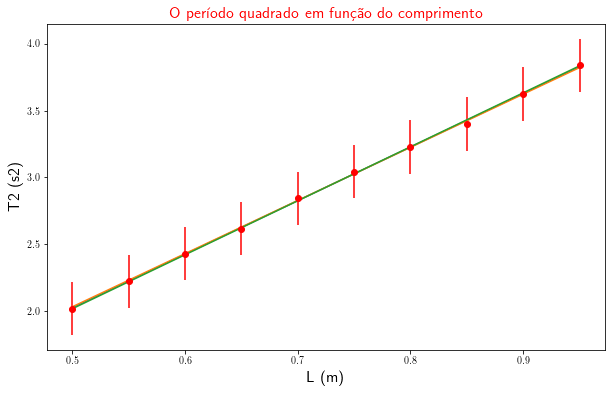

<Figure size 432x288 with 0 Axes>

In [85]:
largura = 10  # Largura da figura
altura  = 6   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
#plt.figure(figsize =(largura, altura), tight_layout=True)     # Define o tamanho do gráfico

plt.xlabel('L (m)', fontsize = 16)
plt.ylabel('T2 (s2)', fontsize = 16)
plt.title('O período quadrado em função do comprimento', fontsize=16, color='r')


#plt.xlim(0,4.1)
# Faz o gráfico dos dados como círculos vermelhos e com barras de erro verticais
plt.errorbar(l, p, fmt = 'ro', yerr = 0.2)
# agora o gráfico da curva de melhor ajuste e também as curvas sigma +- 1 
# (A raiz quadrada do elemento da diagonal da matriz de covariância é a 
#  incerteza no parâmetro de ajuste.)
sigma = [np.sqrt(fitCovariances[0,0]), \
         np.sqrt(fitCovariances[1,1]) ]
plt.plot(l, Reta(l, fitParams[0], fitParams[1]),\
         l, Reta(l, fitParams[0] + sigma[0], fitParams[1] - sigma[1]),\
         l, Reta(l, fitParams[0] - sigma[0], fitParams[1] + sigma[1]) \
         )
plt.show()
# Salvar um gráfico em um arquivo
plt.savefig('DataFitted.pdf', bbox_inches=0, dpi=600)